In [30]:
# Dependencies and Setup
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')



In [31]:

# Files to Load 
mt_df = pd.read_csv("data/mouse_drug_data.csv")
ct_df = pd.read_csv("data/clinicaltrial_data.csv")

In [32]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mt_df.head(100)
ct_df.head(100)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0
...,...,...,...,...
95,k862,0,45.0,0
96,g867,0,45.0,0
97,s619,0,45.0,0
98,w697,0,45.0,0


In [33]:
# Combine the data into a single dataset
df = pd.merge(ct_df, mt_df, on='Mouse ID', how='left' )
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [34]:
# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [35]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_time = df.groupby(['Drug', 'Timepoint'], as_index=False)
TV =  drug_time['Tumor Volume (mm3)'].mean()
mtv_df = pd.DataFrame(data=TV)
mtv_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [36]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_mtv = df.groupby(['Drug', 'Timepoint', ]).sem()
# Convert to DataFrame
sem_df = pd.DataFrame(sem_mtv).reset_index()
sem_df.drop(['Metastatic Sites', 'Mouse ID'], axis = 1, inplace = True)
# Preview DataFrame
sem_df.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [37]:
# Minor Data Munging to Re-Format the Data Frames
pivot_mtv = mtv_df.pivot("Timepoint", "Drug", "Tumor Volume (mm3)")
# Preview that Reformatting worked
pivot_mtv.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [38]:
# Standard Error: Minor Data Munging to Re-Format the Data Frame
SE_df = sem_df.pivot("Timepoint", "Drug", "Tumor Volume (mm3)")

# Preview that Reformatting worked
SE_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


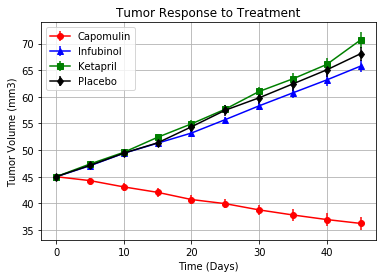

In [41]:

plt.errorbar(pivot_mtv.index.values, pivot_mtv.loc[:,"Capomulin"],
             yerr = SE_df.loc[:, "Capomulin"], marker ='o', color='red', label="Capomulin")
plt.errorbar(pivot_mtv.index.values, pivot_mtv.loc[:,"Infubinol"],
             yerr = SE_df.loc[:, "Infubinol"], marker ='^', color='blue', label="Infubinol")
plt.errorbar(pivot_mtv.index.values, pivot_mtv.loc[:,"Ketapril"],
             yerr = SE_df.loc[:, "Ketapril"], marker ='s', color='green', label="Ketapril")
plt.errorbar(pivot_mtv.index.values, pivot_mtv.loc[:,"Placebo"],
             yerr = SE_df.loc[:, "Placebo"], marker ='d', color='black', label="Placebo" )

plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
lgnd = plt.legend()
# Save the Figure
plt.savefig("Figures/Tumor_response.png")


In [42]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met = df.groupby(["Drug", "Timepoint"], as_index=False)
site = mean_met["Metastatic Sites"].mean()
# Convert to DataFrame
mm_df = pd.DataFrame(site)
# Preview DataFrame
mm_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [43]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
mm_SE = df.groupby(["Drug", "Timepoint"]).sem()
# Convert to DataFrame
mm_SE_df = pd.DataFrame(mm_SE).reset_index()
mm_SE_df.drop(["Mouse ID", "Tumor Volume (mm3)"], axis= 1, inplace= True)
# Preview DataFrame
mm_SE_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [44]:
# Minor Data Munging to Re-Format the Data Frames
mm_df_pivot = mm_df.pivot("Timepoint", "Drug", "Metastatic Sites")
# Preview that Reformatting worked
mm_df_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [45]:
# Standard Error: Minor Data Munging to Re-Format the Data Frame
mm_SE_df_pivot = mm_SE_df.pivot("Timepoint", "Drug", "Metastatic Sites")

# Preview that Reformatting worked
mm_SE_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


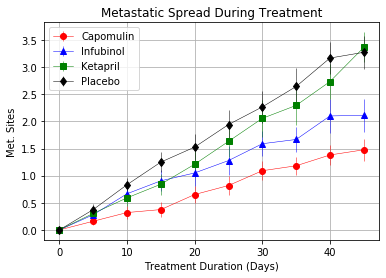

In [46]:
# Generate the Plot (with Error Bars)
plt.errorbar(mm_df_pivot.index.values, mm_df_pivot.loc[:,"Capomulin"],
             yerr = mm_SE_df_pivot.loc[:, "Capomulin"], marker ='o', color='red', label="Capomulin", linewidth=.5)
plt.errorbar(mm_df_pivot.index.values, mm_df_pivot.loc[:,"Infubinol"],
             yerr = mm_SE_df_pivot.loc[:, "Infubinol"], marker ='^', color='blue', label="Infubinol", linewidth=.5)
plt.errorbar(mm_df_pivot.index.values, mm_df_pivot.loc[:,"Ketapril"],
             yerr = mm_SE_df_pivot.loc[:, "Ketapril"], marker ='s', color='green', label="Ketapril", linewidth=.5)
plt.errorbar(mm_df_pivot.index.values, mm_df_pivot.loc[:,"Placebo"],
             yerr = mm_SE_df_pivot.loc[:, "Placebo"], marker ='d', color='black', label="Placebo", linewidth=.5)

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid()
lgnd = plt.legend()             
# Save the Figure
plt.savefig("Figures/TMeta_Spread.png")

## Survival Rates

In [47]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
dt_mice = df.groupby(["Drug", "Timepoint"], as_index=False)
mice_id = dt_mice["Mouse ID"].count()
# Convert to DataFrame
mice_df = pd.DataFrame(data=mice_id)
# Preview DataFrame
mice_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [48]:
# Minor Data Munging to Re-Format the Data Frames
mice_df_pivot = mice_df.pivot("Timepoint", "Drug", "Mouse ID")
# Preview the Data Frame
mice_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


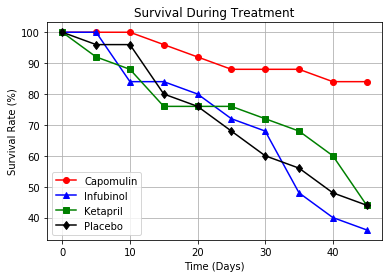

In [49]:
# Generate the Plot (Accounting for percentages)
plt.plot(mice_df_pivot.index.values, mice_df_pivot.loc[:,"Capomulin"] / mice_df_pivot.loc[0,"Capomulin"] * 100,
         marker ='o', color='red', label="Capomulin")
plt.plot(mice_df_pivot.index.values, mice_df_pivot.loc[:,"Infubinol"] / mice_df_pivot.loc[0,"Infubinol"] * 100,
         marker ='^', color='blue', label="Infubinol")
plt.plot(mice_df_pivot.index.values, mice_df_pivot.loc[:,"Ketapril"] / mice_df_pivot.loc[0,"Ketapril"] * 100,
         marker ='s', color='green', label="Ketapril")
plt.plot(mice_df_pivot.index.values, mice_df_pivot.loc[:,"Placebo"] / mice_df_pivot.loc[0,"Placebo"] * 100,
         marker ='d', color='black', label="Placebo")

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
lgnd = plt.legend()
# Save the Figure

plt.savefig("Figures/Survival.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [50]:
# Calculate the percent changes for each drug
first_last = pivot_mtv.drop([5,10,15,20,25,30,35,40], axis = 0)
pct_change = first_last.append( (first_last.loc[45,:] - first_last.loc[0,:]) / first_last.loc[0,:] * 100, ignore_index=True)
pct_change.drop([0,1], axis = 0, inplace = True)
perct_change = pct_change.transpose()
percent_change = perct_change.rename(columns={2:"Percent Change"})

# Display the data to confirm
percent_change.head()

,Percent Change
Drug,
Capomulin,-19.475303
Ceftamin,42.516492
Infubinol,46.123472
Ketapril,57.028795
Naftisol,53.923347


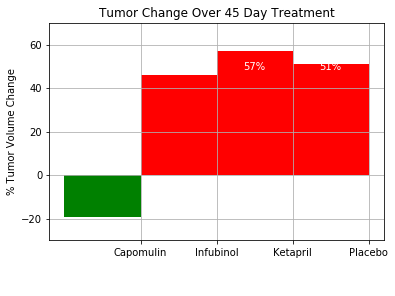

In [51]:
# Store all Relevant Percent Changes into a Tuple
pecentage_df = percent_change.drop(["Ceftamin", "Naftisol", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"], axis = 0)

# Splice the data between passing and failing drugs
pass_df= pecentage_df[pecentage_df["Percent Change"] <= 0]
fail_df= pecentage_df[pecentage_df["Percent Change"] > 0]


# Orient widths. Add labels, tick marks, etc. 
fig, ax = plt.subplots()
rects1 = ax.bar(pass_df.index.values, pass_df["Percent Change"], color = 'g',width=-1, align="edge")
rects2 = ax.bar(fail_df.index.values, fail_df["Percent Change"], color = 'r',width=-1, align="edge")
ax.set_title("Tumor Change Over 45 Day Treatment")
ax.set_ylabel("% Tumor Volume Change")
ax.grid()
ax.set_yticks([-20, 0, 20, 40, 60])
ax.set_ylim(-30, 70)
# Use functions to label the percentages of changes
def autolabel(rects, ax):
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    for rect in rects:
        height = rect.get_height()
        p_height = (height / y_height)
        if height > 0:
            label_position = y_height * .5
        else:
            label_position = -y_height * .5
        ax.text(rect.get_x() + rect.get_width()/2., label_position,
                '%d' % int(height) + "%",
                ha='center', va='center', color='white')
        

# Call functions to implement the function calls
autolabel(rects1,ax)
autolabel(rects2,ax)

# Save the Figure
plt.savefig("Figures/Tumor_Change.png")

# Show the Figure
fig.show()